In [2]:
from PIL import Image
from helper_functions import *
from window import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.metrics import jaccard_similarity_score

from sklearn.manifold import TSNE

In [2]:
location = (6000,6000)
shape = (400,400)
pool_size = (2,2)

landsat_dir = "data/landsat-8/024031/"
mvp_dates = ['2017-02-26', '2017-04-15', '2017-06-02', '2017-09-22', '2017-10-08', '2017-11-09', '2017-11-25']


In [3]:
%%time
mvp_scene = Scene(landsat_dir, mvp_dates)
mvp = Window(mvp_scene, location, shape, pool_size)

CPU times: user 13.6 s, sys: 18.2 s, total: 31.8 s
Wall time: 1min 22s


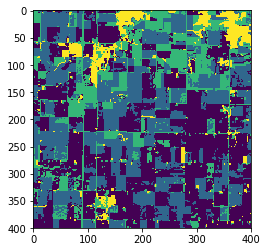

In [6]:

kmn = KMeans(n_clusters = 4)
mvp.cluster(kmn);
labels_4 = mvp.rebuild()
plt.imshow(labels_4)

0.9494 0.0009 0.0019 0.0001 0.0007 0.0005 0.0020 0.0000 
0.0002 0.9040 0.0005 0.0127 0.0009 0.0015 0.0001 0.0000 
0.0001 0.0112 0.0011 0.7552 0.0000 0.0002 0.1625 0.0000 
0.0017 0.0094 0.0000 0.0000 0.8949 0.0010 0.0622 0.0000 
0.0111 0.0119 0.6858 0.0144 0.0007 0.0000 0.0113 0.0000 
0.0168 0.0075 0.2320 0.0063 0.0005 0.0455 0.0046 0.0085 
0.0000 0.0000 0.0000 0.0000 0.0000 0.9027 0.0005 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9127 


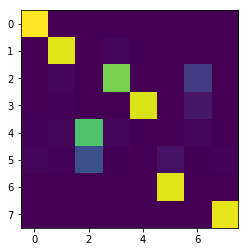

In [18]:
kmeans = KMeans(n_clusters=8)
mvp.cluster(kmeans)
s1 = mvp.labels
mvp.cluster(kmeans)
s2 = mvp.labels
jaccard_scores = pairwise_jaccard(s1,s2)

for row in pairwise_jaccard(s1,s2):
    for item in row:
        print("{:.4f} ".format(item), end="")
    print()

plt.imshow(pairwise_jaccard(s1,s2))

0.9532 0.0002 0.0000 0.0007 0.0007 0.0152 0.0000 0.0000 
0.0005 0.9385 0.0004 0.0011 0.0007 0.0247 0.0001 0.0000 
0.0001 0.0012 0.9539 0.0006 0.0011 0.0110 0.0000 0.0000 
0.0006 0.0019 0.0002 0.9780 0.0000 0.0060 0.0000 0.0000 
0.0098 0.0101 0.0123 0.0011 0.7817 0.0046 0.0000 0.0000 
0.0066 0.0002 0.0021 0.0000 0.1272 0.3496 0.0000 0.0143 
0.0001 0.0000 0.0000 0.0006 0.0000 0.1421 0.7411 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.8614 


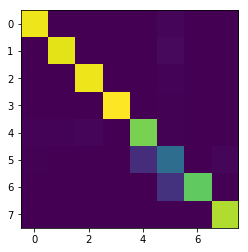

In [19]:
kmeans = KMeans(n_clusters=8)
mvp.cluster(kmeans)
s1 = mvp.labels
mvp.cluster(kmeans)
s2 = mvp.labels
jaccard_scores = pairwise_jaccard(s1,s2)

for row in pairwise_jaccard(s1,s2):
    for item in row:
        print("{:.4f} ".format(item), end="")
    print()

plt.imshow(pairwise_jaccard(s1,s2))

In [1]:
kmeans = KMeans(n_clusters = 7)
mvp.cluster(kmeans)
plt.figure(dpi=200)
plt.imshow(mvp.rebuild(), cmap="tab10")
plt.colorbar()

NameError: name 'KMeans' is not defined

In [102]:
raise MemoryError ("Next cell takes 30 min")

MemoryError: Next cell takes 30 min

CPU times: user 29min 39s, sys: 2.94 s, total: 29min 42s
Wall time: 20min 7s


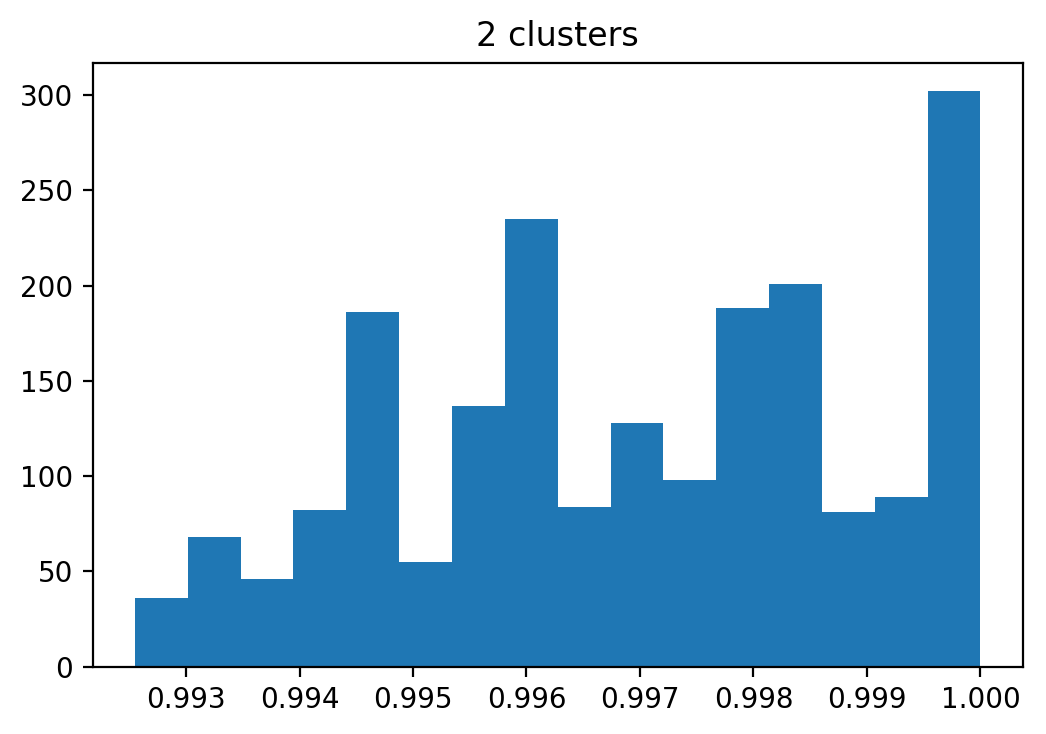

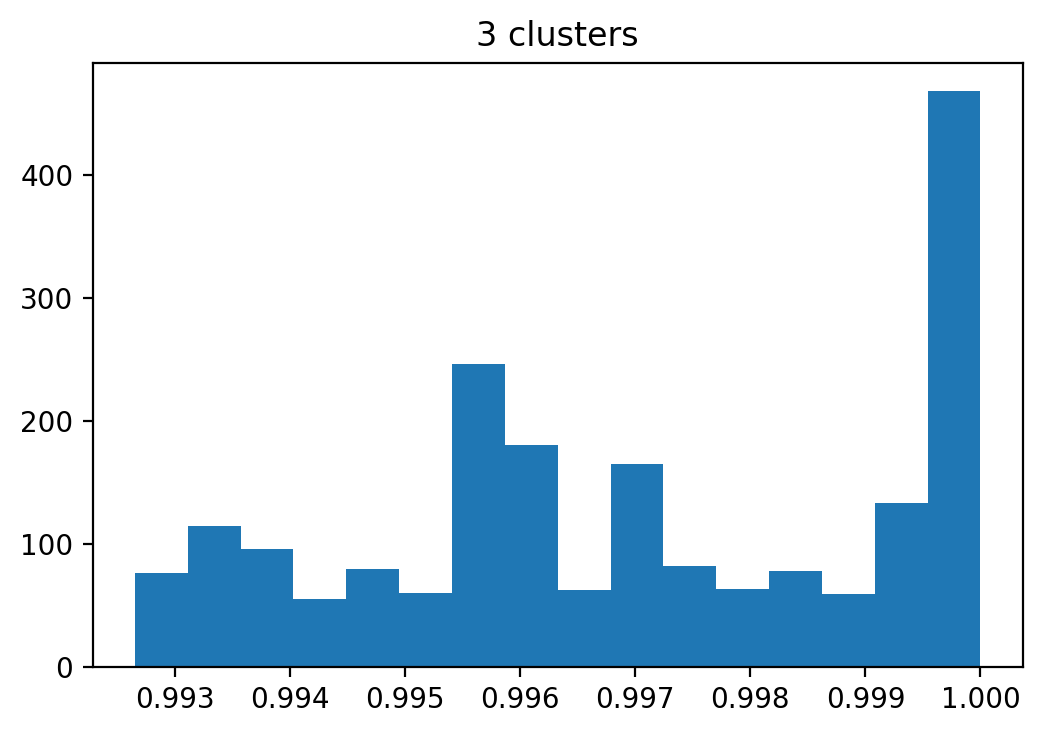

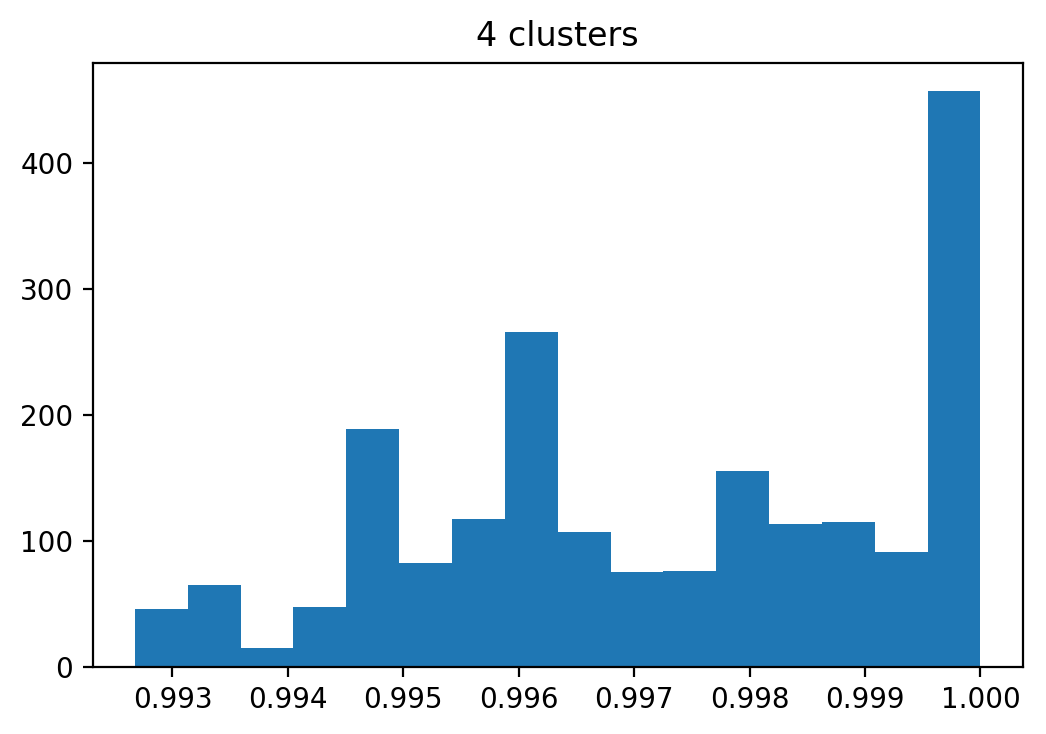

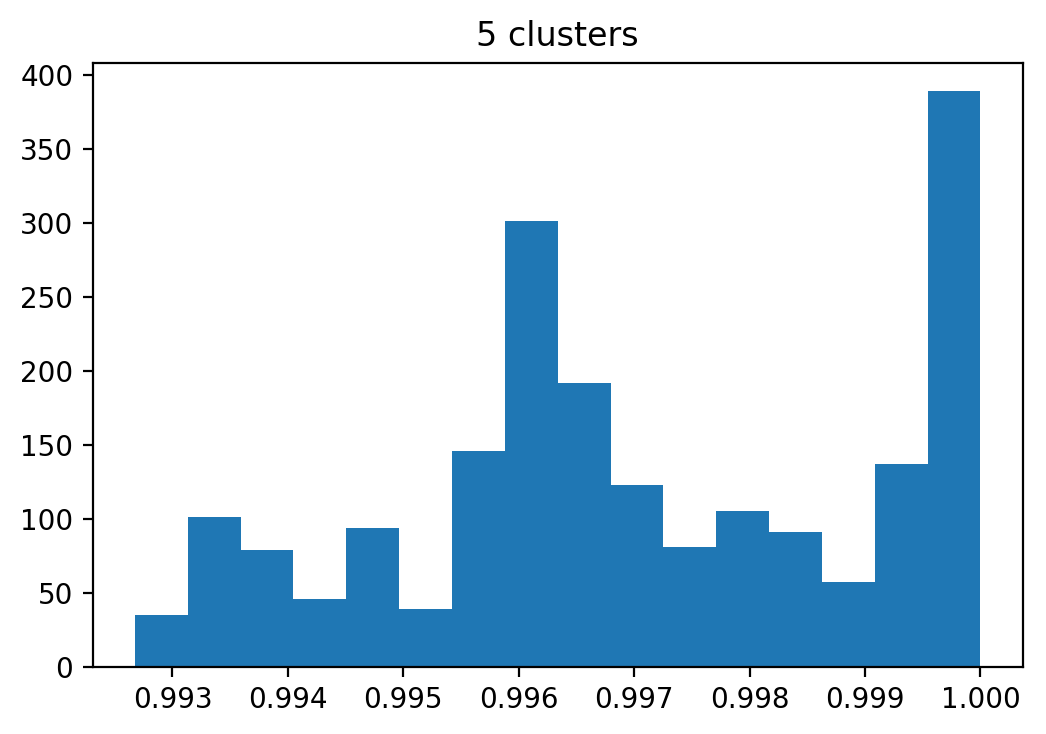

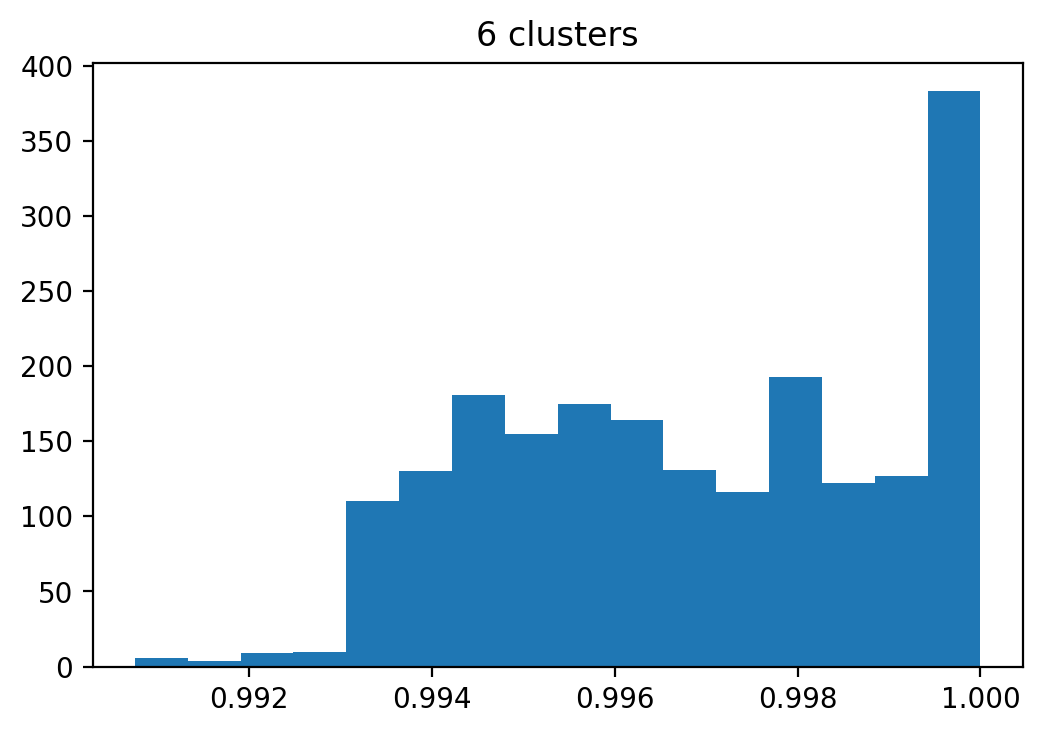

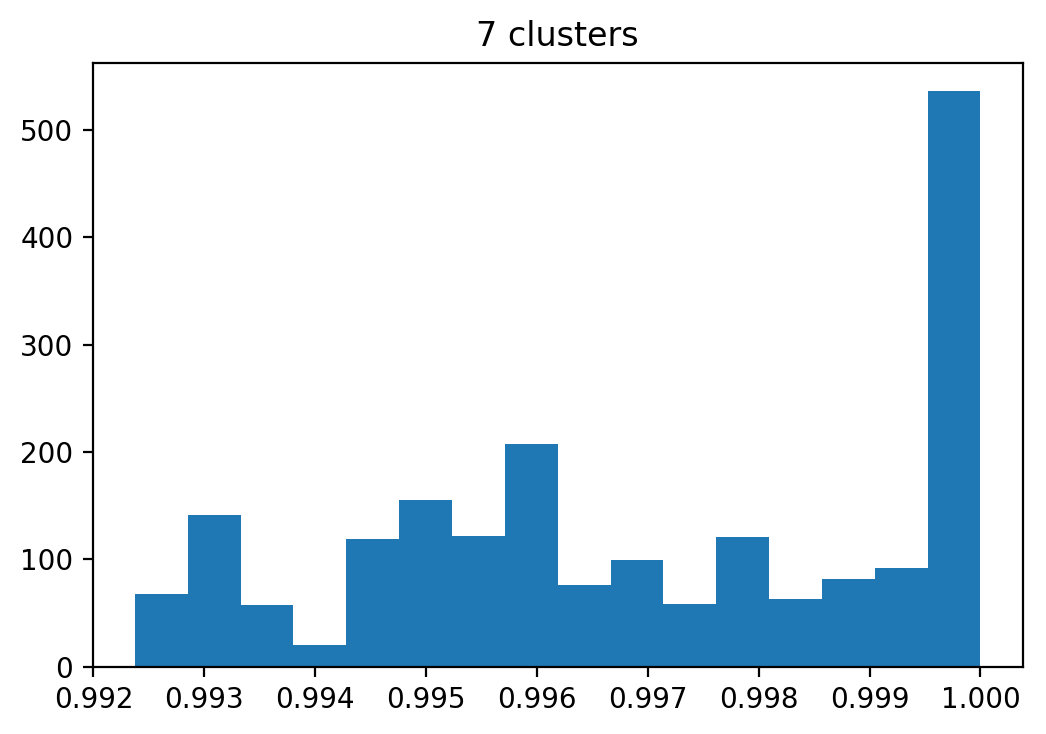

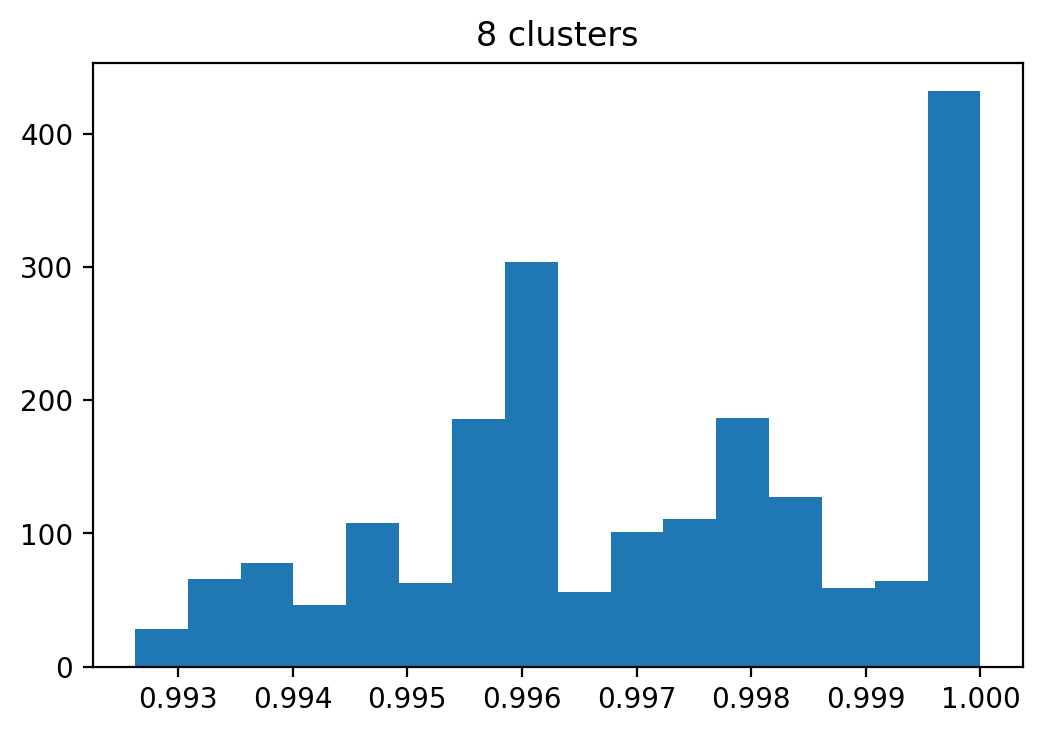

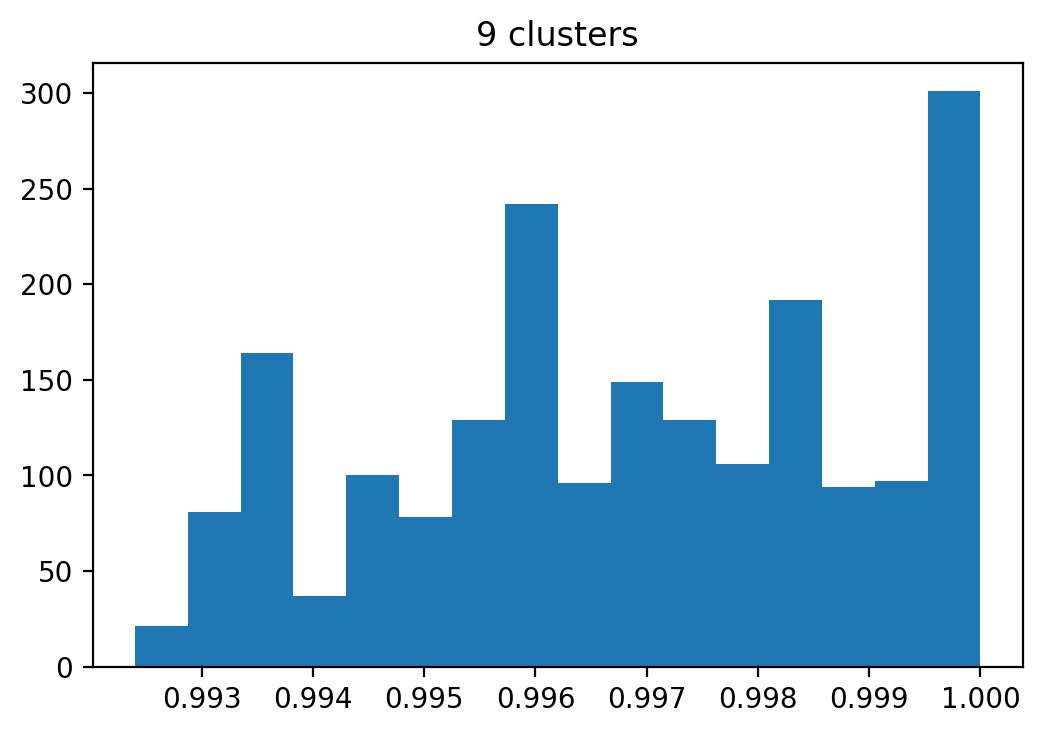

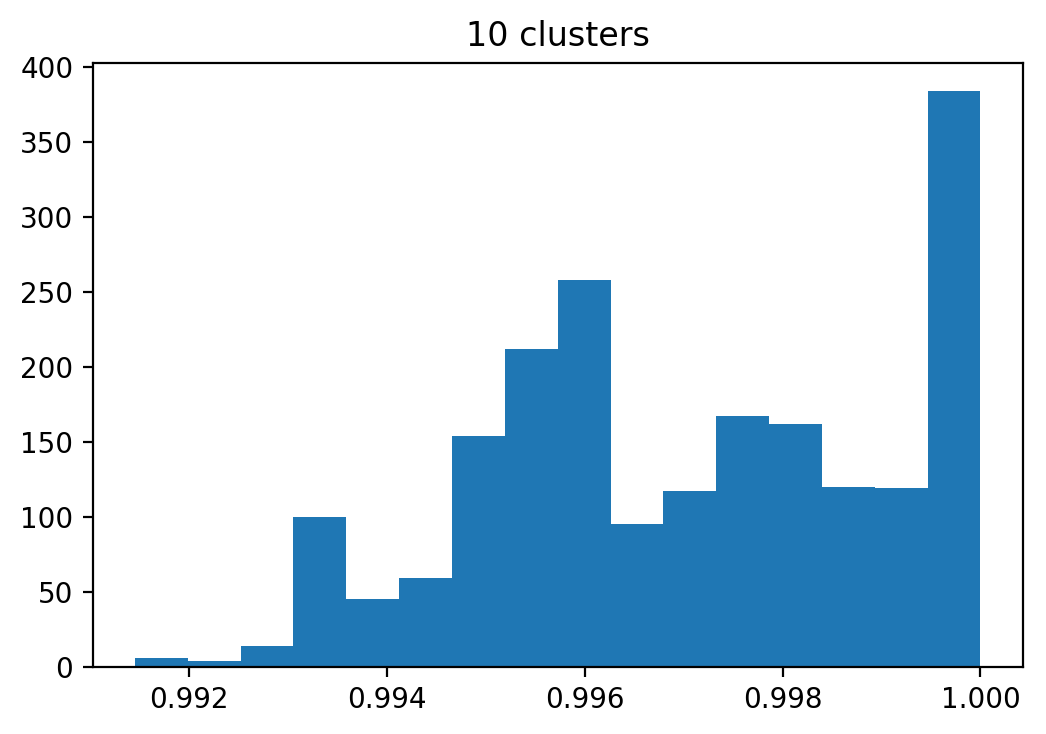

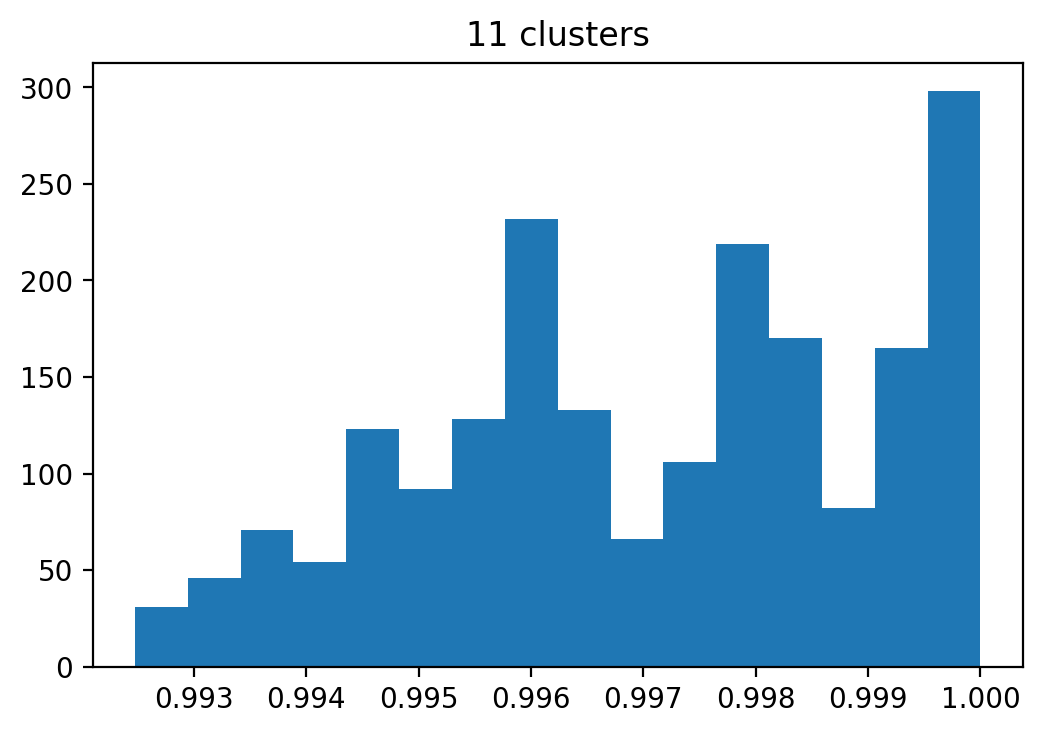

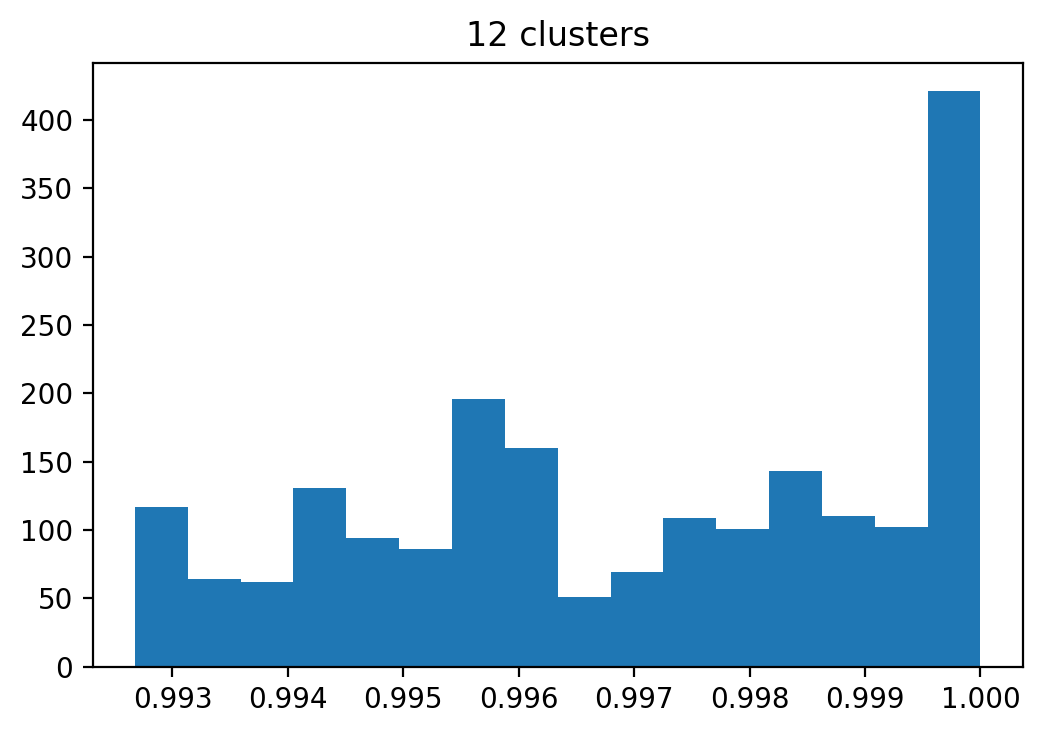

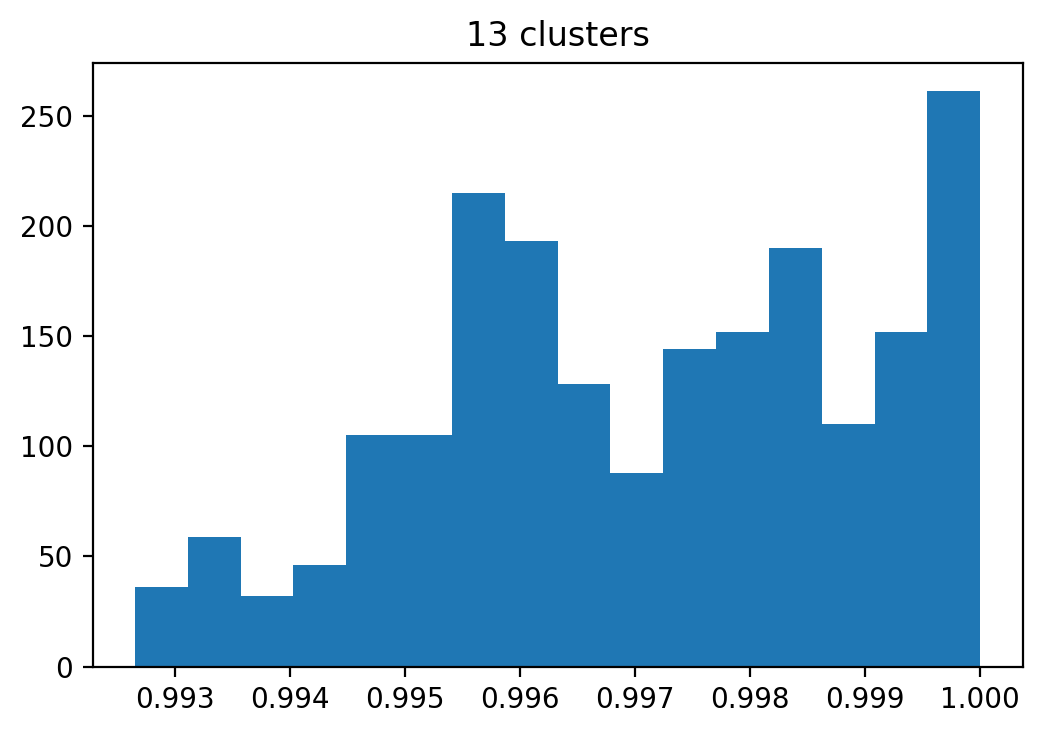

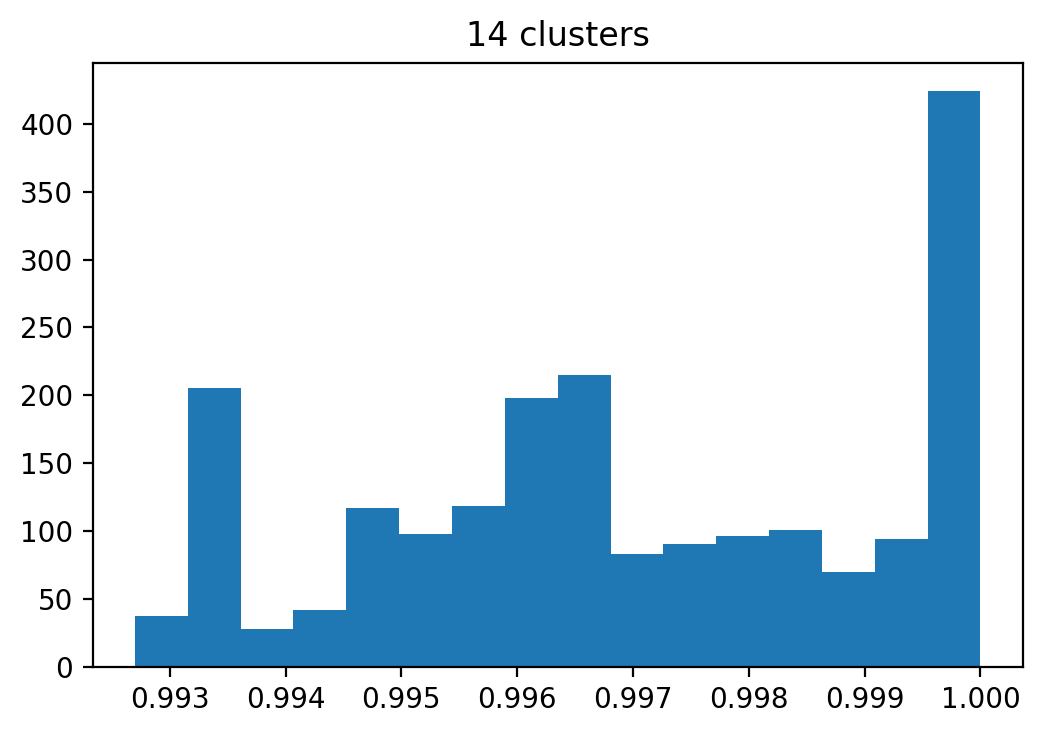

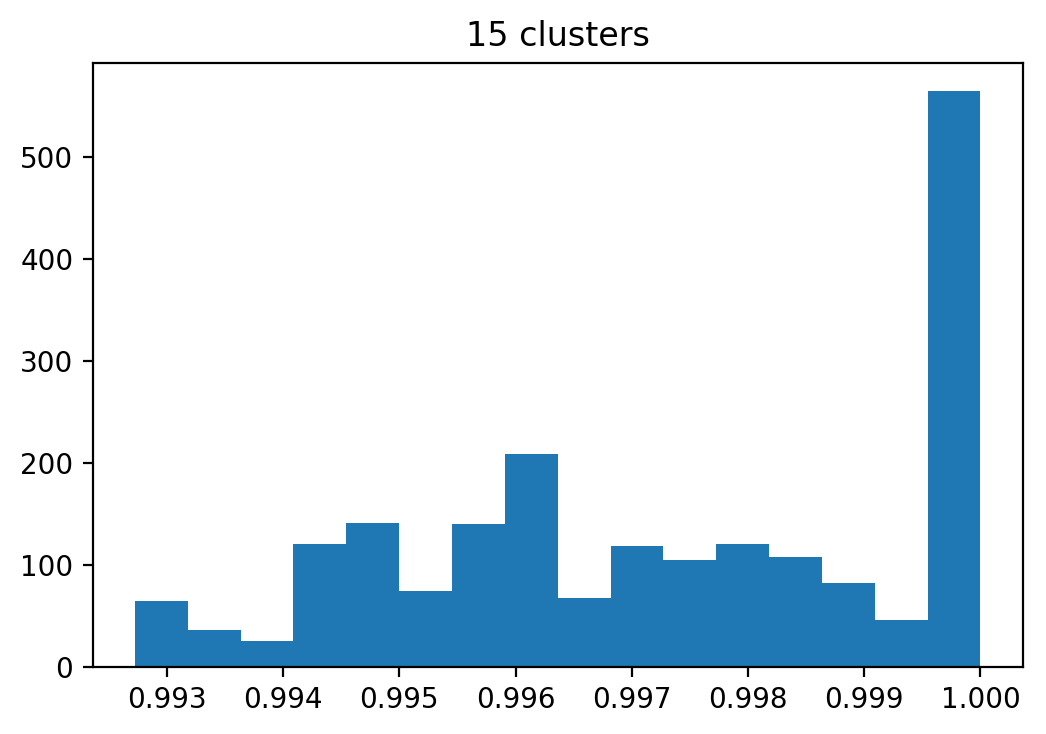

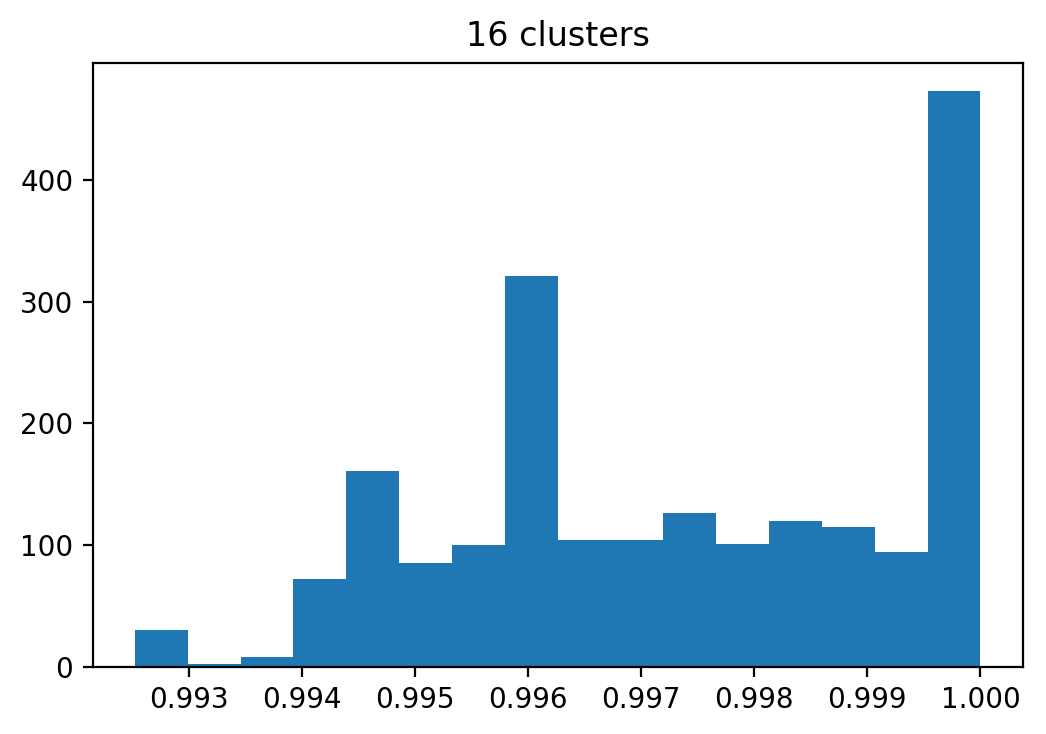

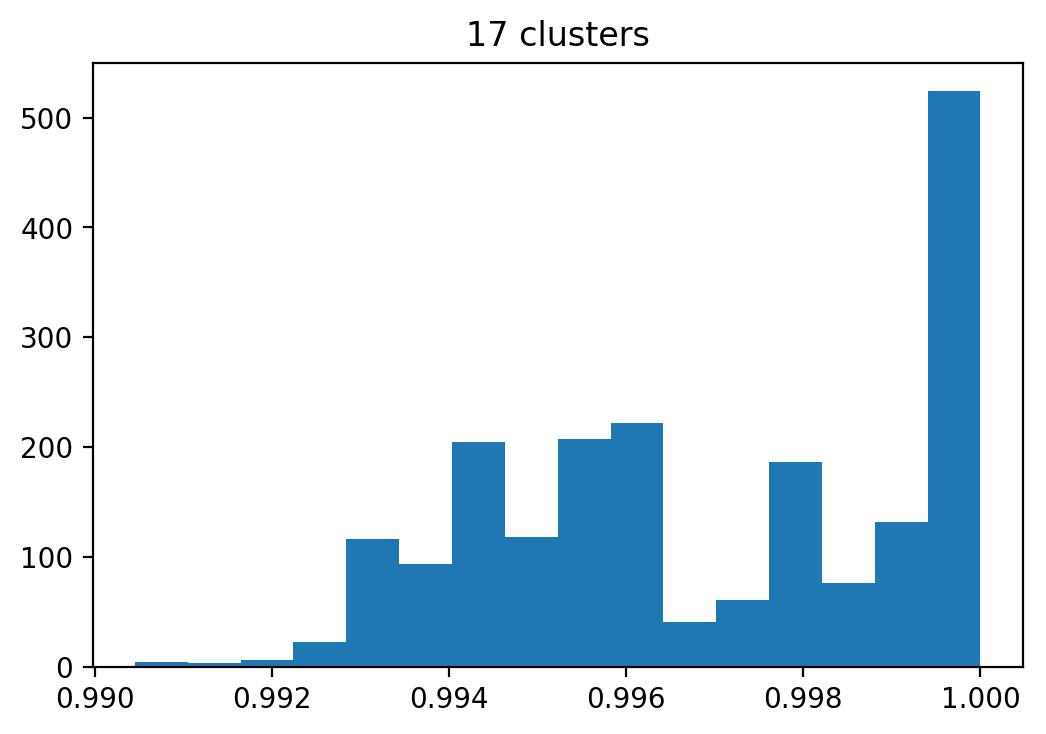

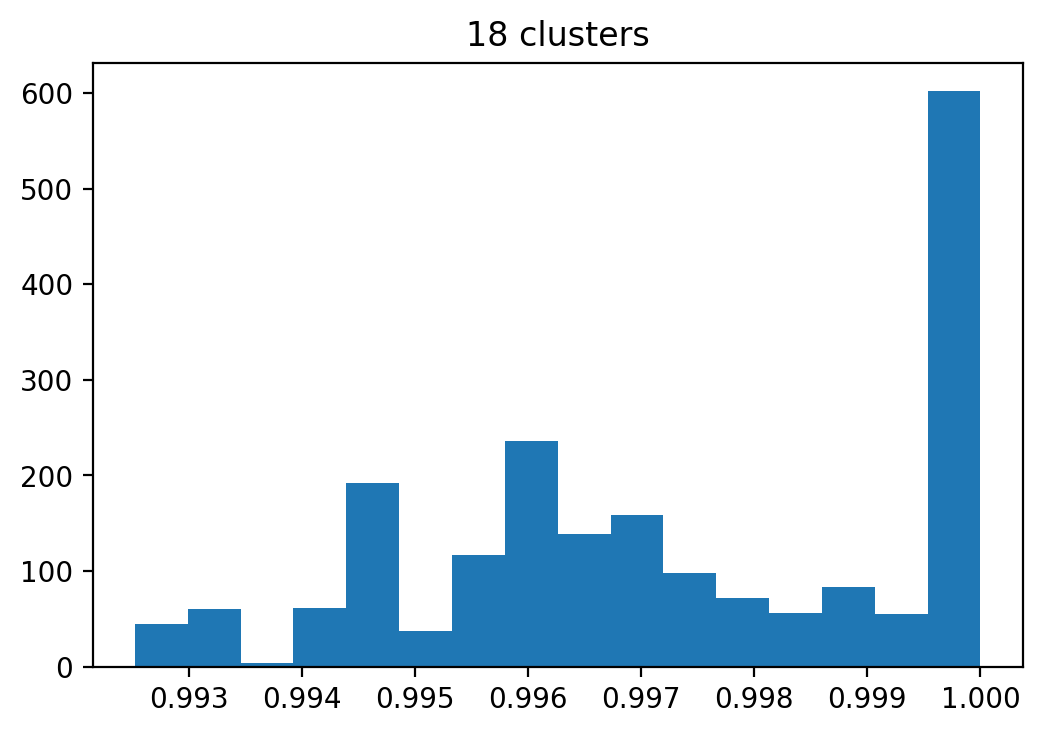

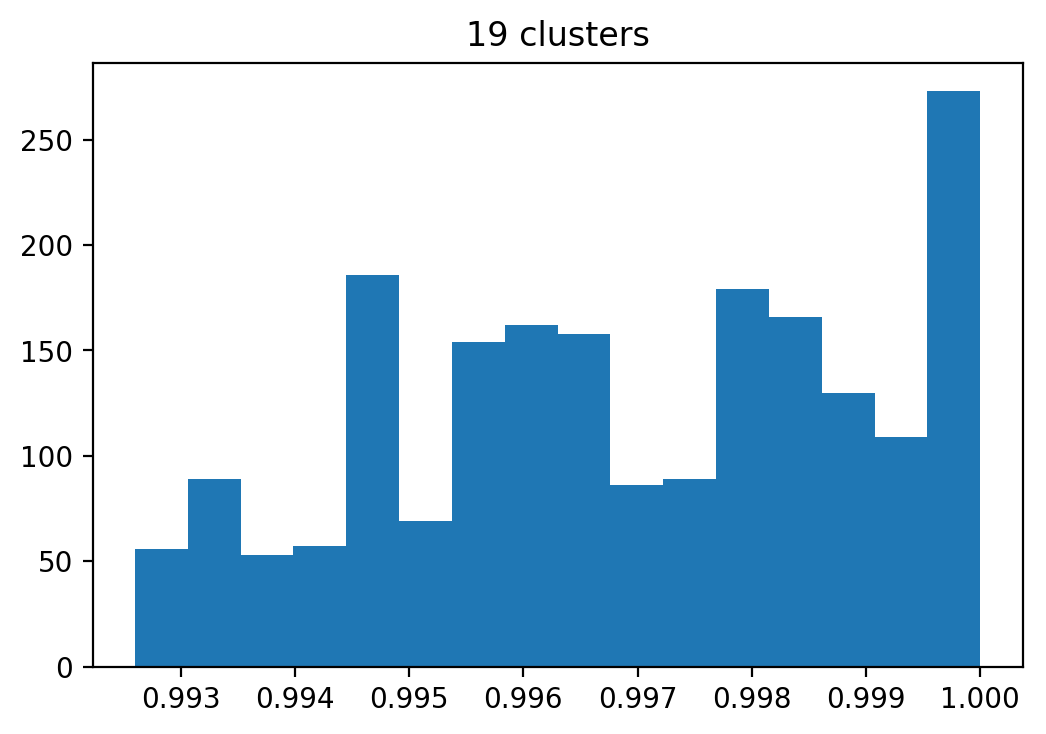

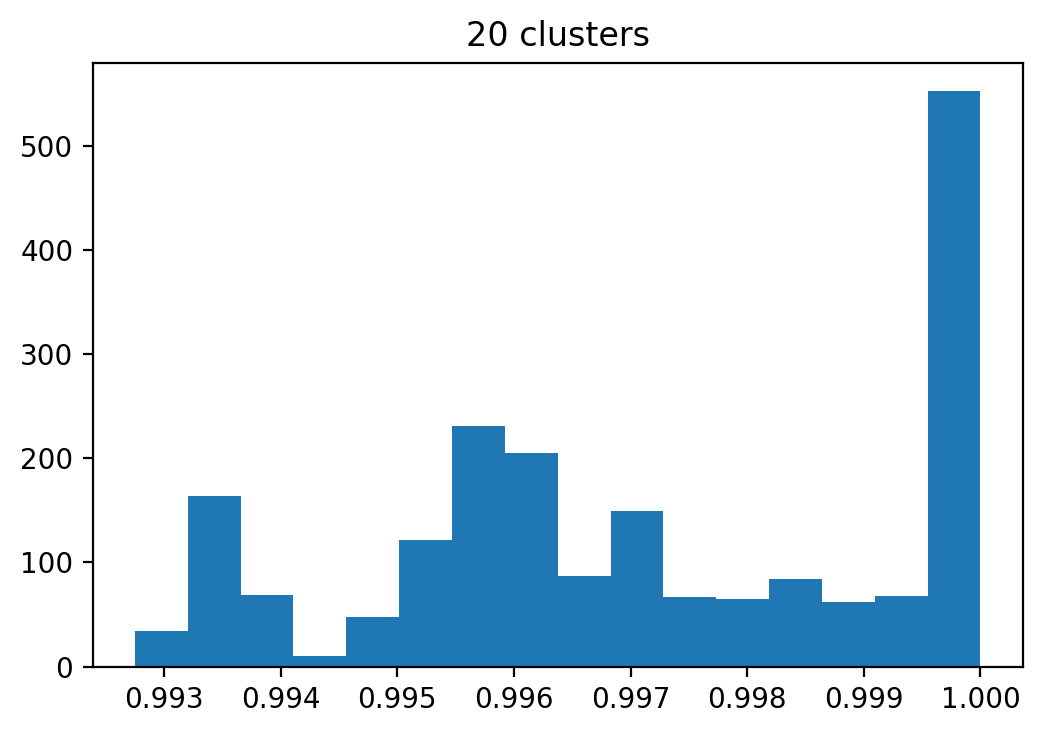

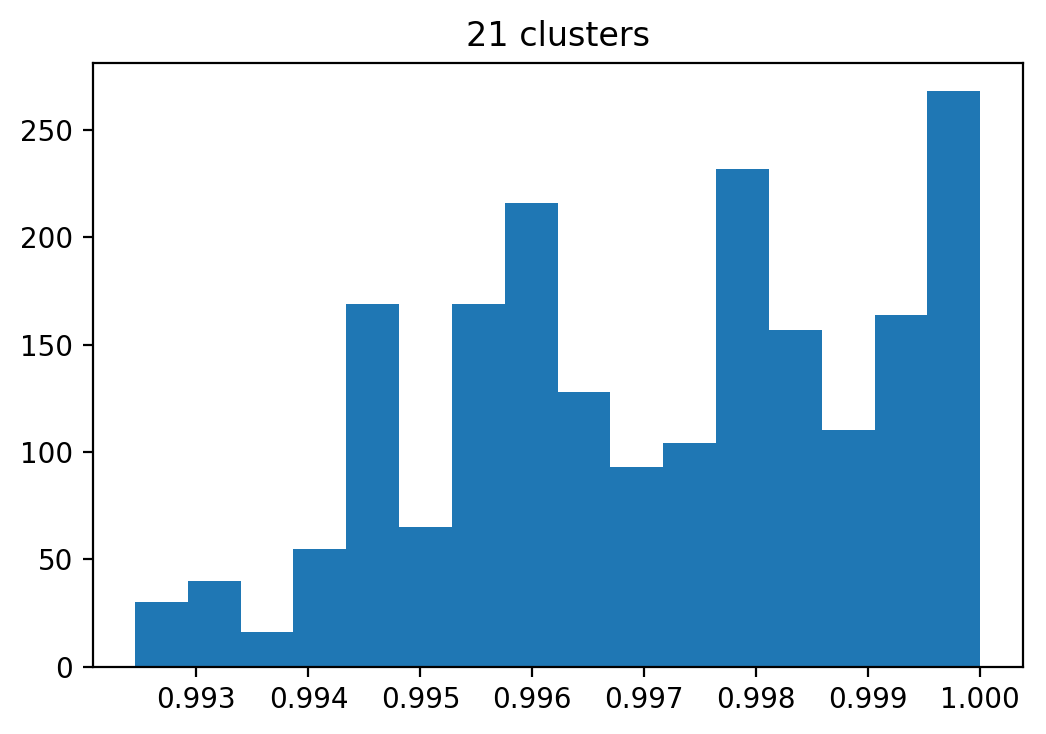

In [96]:
%%time
k = 7
for k in range(2,22):
    labels = []
    for _ in range(64):
        kmeans = KMeans(n_clusters = k)
        mvp.cluster(kmn)
        labels.append(mvp.labels)
    jaccards = np.array([ jaccard_similarity_score(labels[i], labels[j])
                       for i in range(len(labels))
                       for j in range(i)
                       if i != j ])
    plt.figure(dpi=200)
    plt.title("{} clusters".format(k))
    plt.hist(jaccards, bins=16);

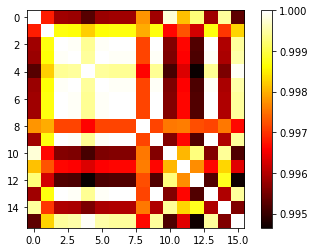

In [64]:
jaccards = np.array([[ jaccard_similarity_score(i,j)
                       for i in labels]
                       for j in labels])
plt.imshow(jaccards, cmap="hot")
plt.colorbar()

In [60]:
kmn.cluster_centers_

array([[-2.93440975e+00, -3.24068356e-01, -1.32150073e+00,
        -1.22604372e+00,  4.19595034e-01,  9.63021435e-01,
        -9.92033033e-02,  1.26950511e-01, -1.69525415e-01],
       [-3.79313974e-01,  2.25089200e+00, -2.13010045e+00,
         1.28763754e+00,  1.31828762e-01, -7.42589099e-01,
         9.88790658e-02, -2.36582053e-02,  1.14423685e-01],
       [ 4.49169302e+00,  9.18669482e-01,  6.21184316e-01,
        -1.16284059e+00, -6.23251110e-01, -2.14812229e-01,
        -3.35918613e-02, -2.64964600e-01, -2.29178999e-01],
       [ 3.08522614e-01, -3.01136921e+00,  7.79651515e-01,
         6.15902240e-01,  1.09867123e-01,  3.00130464e-02,
         3.71194318e-02, -1.78943080e-02,  5.56095993e-02],
       [-6.08170979e+00,  3.35487636e+00,  6.34336082e+00,
        -5.53994950e-01, -8.30745958e-01, -3.85280914e-01,
        -1.75981120e-01,  1.03328483e-01,  5.32521776e-01],
       [ 2.29368649e+01,  6.99627304e+00,  4.10243900e+00,
         2.12510601e+00,  3.00810701e+00,  5.515423

In [61]:
counters = [ Counter(lbl) for lbl in labels ]

In [62]:
for ctr in counters:
    print(ctr)

Counter({0: 11974, 1: 9529, 2: 8277, 3: 7424, 4: 2541, 5: 255})
Counter({0: 11961, 1: 9538, 2: 8229, 3: 7471, 4: 2545, 5: 256})
Counter({0: 11950, 1: 9524, 2: 8250, 3: 7468, 4: 2541, 5: 267})
Counter({0: 11975, 1: 9529, 2: 8277, 3: 7423, 4: 2541, 5: 255})
Counter({0: 11921, 1: 9528, 2: 8231, 3: 7509, 4: 2544, 5: 267})
Counter({0: 11936, 1: 9523, 2: 8337, 3: 7411, 4: 2541, 5: 252})
Counter({0: 11974, 1: 9529, 2: 8277, 3: 7424, 4: 2541, 5: 255})
Counter({0: 11965, 1: 9539, 2: 8216, 3: 7480, 4: 2545, 5: 255})


In [51]:
no_pooling = Window(mvp_scene, location, shape)


In [54]:
nopool_clusters = []
for _ in range(8):
    no_pooling.cluster(kmn)
    nopool_clusters.append(no_pooling.labels)

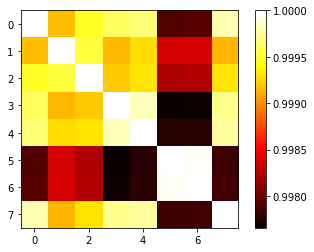

In [55]:
nop_jaccards = np.array([[ jaccard_similarity_score(i,j)
                       for i in nopool_clusters]
                       for j in nopool_clusters])
plt.imshow(nop_jaccards, cmap="hot")
plt.colorbar()

In [57]:
counters = [ Counter(lbl) for lbl in nopool_clusters ]
for c in counters: print(c)

Counter({0: 35163, 1: 28963, 2: 27967, 3: 26619, 4: 24069, 5: 9603, 6: 6281, 7: 1335})
Counter({0: 35141, 1: 28975, 2: 27977, 3: 26608, 4: 24040, 5: 9615, 6: 6311, 7: 1333})
Counter({0: 35155, 1: 28962, 2: 27965, 3: 26617, 4: 24052, 5: 9610, 6: 6306, 7: 1333})
Counter({0: 35164, 1: 28966, 2: 27987, 3: 26616, 4: 24068, 5: 9595, 6: 6271, 7: 1333})
Counter({0: 35158, 1: 28971, 2: 27983, 3: 26620, 4: 24061, 5: 9599, 6: 6275, 7: 1333})
Counter({0: 35124, 1: 28978, 2: 27904, 3: 26616, 4: 23992, 5: 9663, 6: 6386, 7: 1337})
Counter({0: 35124, 1: 28979, 2: 27904, 3: 26616, 4: 23993, 5: 9662, 6: 6385, 7: 1337})
Counter({0: 35165, 1: 28964, 2: 27970, 3: 26617, 4: 24072, 5: 9600, 6: 6277, 7: 1335})


In [ ]:
k